# Information Metrics

This notebooks runs information theory metrics on time series signals, including several entropy measures. 

This notebook includes:
- approximate entropy
- sample entropy
- permutation entropy
- weighted permutation entropy

Notes:
- sample & approximate entroy are pretty similar, maybe don't need both (?)
- other metrics we don't currently consider: multiscale entropy, weighted permutation entropy
- there are important parameter inputs to these measures, that could be explored

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.core.db import APMDB
from apm.run import run_sims_parallel as run_sims
from apm.methods import app_entropy, sample_entropy, perm_entropy, wperm_entropy
from apm.methods.settings import AP_ENT_PARAMS, SA_ENT_PARAMS, PE_ENT_PARAMS, WPE_ENT_PARAMS
from apm.plts.sims import plot_ap_sims, plot_pe_sims
from apm.sim.settings import FS, SIM_PARAMS_AP, SIM_PARAMS_COMB, EXPS, FREQS, POWERS, N_SIMS, EXP
from apm.sim.examples import SIG_AP, SIG_KN, SIG_OSC, SIG_COMB

## Settings

In [3]:
# Custom settings
N_SIMS = 10

In [4]:
# Check settings for entropy measures
print('Approximate Entropy:\t', AP_ENT_PARAMS)
print('Sample Entropy: \t', SA_ENT_PARAMS)
print('Permutation Entropy:\t', PE_ENT_PARAMS)
print('WPermutation Entropy:\t', WPE_ENT_PARAMS)

Approximate Entropy:	 {'order': 2}
Sample Entropy: 	 {'order': 2}
Permutation Entropy:	 {'order': 3, 'delay': 1}
WPermutation Entropy:	 {'order': 3, 'delay': 1}


In [5]:
# Set the random seed
set_random_seed(111)

In [6]:
# Settings for saving figures
SAVE_FIG = True
EXT = '.pdf'
FIGPATH = APMDB().figs_path / '17_entropy'

## Calculating Entropy Measures on Example Signals

Entropy measures generally measure the level of 'randomness' or complexity in a signal. 

In all cases, smaller values of measured entropy indicate more regular time series. 

In [7]:
print('Computed approximate entropy:')
print('  powerlaw: \t {:1.4f}'.format(app_entropy(SIG_AP, **AP_ENT_PARAMS)))
print('  osc:      \t {:1.4f}'.format(app_entropy(SIG_OSC, **AP_ENT_PARAMS)))
print('  combined: \t {:1.4f}'.format(app_entropy(SIG_COMB, **AP_ENT_PARAMS)))
print('  knee:     \t {:1.4f}'.format(app_entropy(SIG_KN, **AP_ENT_PARAMS)))

Computed approximate entropy:
  powerlaw: 	 0.2986
  osc:      	 0.2010
  combined: 	 1.0318
  knee:     	 1.4825


In [8]:
print('Computed sample entropy:')
print('  powerlaw: \t {:1.4f}'.format(sample_entropy(SIG_AP, **SA_ENT_PARAMS)))
print('  osc:      \t {:1.4f}'.format(sample_entropy(SIG_OSC, **SA_ENT_PARAMS)))
print('  combined: \t {:1.4f}'.format(sample_entropy(SIG_COMB, **SA_ENT_PARAMS)))
print('  knee:     \t {:1.4f}'.format(sample_entropy(SIG_KN, **SA_ENT_PARAMS)))

Computed sample entropy:
  powerlaw: 	 0.2806
  osc:      	 0.1629
  combined: 	 0.9360
  knee:     	 1.3721


In [9]:
print('Computed permutation entropy:')
print('  powerlaw: \t {:1.4f}'.format(perm_entropy(SIG_AP, **PE_ENT_PARAMS)))
print('  osc:      \t {:1.4f}'.format(perm_entropy(SIG_OSC, **PE_ENT_PARAMS)))
print('  combined: \t {:1.4f}'.format(perm_entropy(SIG_COMB, **PE_ENT_PARAMS)))
print('  knee:     \t {:1.4f}'.format(perm_entropy(SIG_KN, **PE_ENT_PARAMS)))

Computed permutation entropy:
  powerlaw: 	 2.5272
  osc:      	 1.1414
  combined: 	 2.5227
  knee:     	 2.5121


## Approximate Entropy

Approximate entropy quantifies the unpredictability of a time series.

#### Aperiodic Variations

In [11]:
# Run simulations calculating approximate entropy across exponents
ap_sims_exp, ap_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, app_entropy, AP_ENT_PARAMS, 
    'update_exp', EXPS, N_SIMS, var_func=np.std)

In [12]:
# Run simulations calculating approximate entropy across exponents, with an oscillation
ap_sims_comb, ap_sims_exp_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, app_entropy, AP_ENT_PARAMS, 
    'update_comb_exp', EXPS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


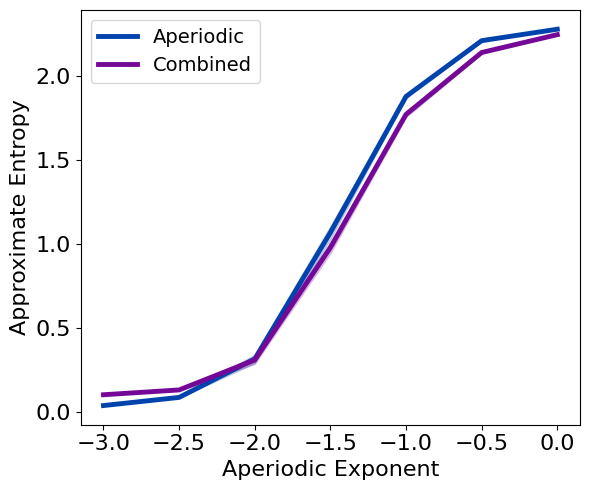

In [13]:
# Plot approximate entropy measures across aperiodic variations
plot_ap_sims(ap_sims_exp, ap_sims_exp_var, ap_sims_comb, ap_sims_exp_comb_var,
             'Approximate Entropy', save_fig=SAVE_FIG, file_name='ap_ap' + EXT, file_path=FIGPATH)

#### Periodic Variations

In [14]:
# Run simulations calculating approximate entropy across oscillation frequency
ap_sims_freq, ap_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, app_entropy, AP_ENT_PARAMS,
    'update_freq', FREQS, N_SIMS, var_func=np.std)

In [15]:
# Run simulations calculating approximate entropy across oscillation power
ap_sims_pow, ap_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, app_entropy, AP_ENT_PARAMS,
    'update_pow', POWERS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


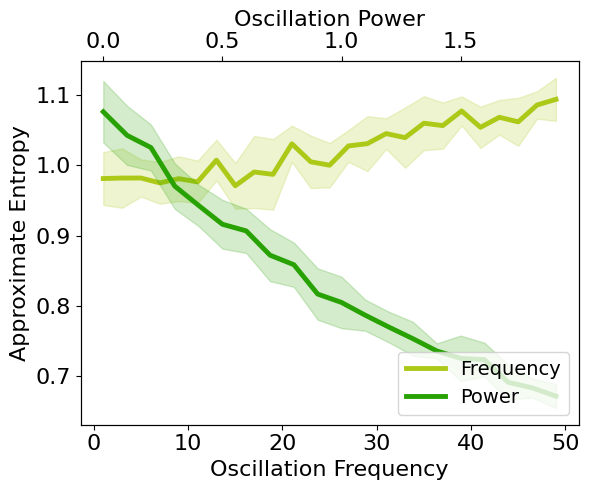

In [16]:
# Plot approximate entropy measures across aperiodic variations
plot_pe_sims(ap_sims_freq, ap_sims_freq_var, ap_sims_pow, ap_sims_pow_var,
             'Approximate Entropy', save_fig=SAVE_FIG, file_name='ap_pe' + EXT, file_path=FIGPATH)

## Sample Entropy

Sample entropy is a modification of approxmiate entropy for physiological time series.

The modifications of sample entropy make it data length independent.

#### Aperiodic Variations

In [17]:
# Run simulations calculating sample entropy across exponents
sa_sims_exp, sa_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, sample_entropy, SA_ENT_PARAMS,
    'update_exp', EXPS, N_SIMS, var_func=np.std)

In [18]:
# Run simulations calculating sample entropy across exponents, with an oscillation
sa_sims_comb, sa_sims_exp_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, sample_entropy, SA_ENT_PARAMS,
    'update_comb_exp', EXPS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


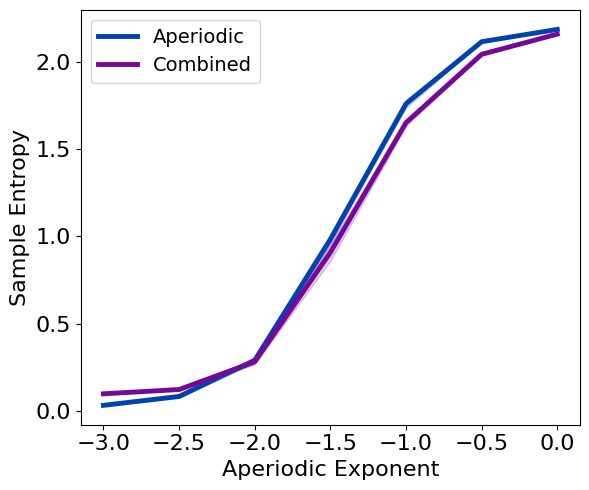

In [19]:
# Plot sample entropy measures across aperiodic variations
plot_ap_sims(sa_sims_exp, sa_sims_exp_var, sa_sims_comb, sa_sims_exp_comb_var,
             'Sample Entropy', save_fig=SAVE_FIG, file_name='sa_ap' + EXT, file_path=FIGPATH)

#### Periodic Variations

In [20]:
# Run simulations calculating sample entropy across oscillation frequency
sa_sims_freq, sa_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, sample_entropy, SA_ENT_PARAMS,
    'update_freq', FREQS, N_SIMS, var_func=np.std)

In [21]:
# Run a set of simulations, calculating sample entropy across oscillation power
sa_sims_pow, sa_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, sample_entropy, SA_ENT_PARAMS,
    'update_pow', POWERS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


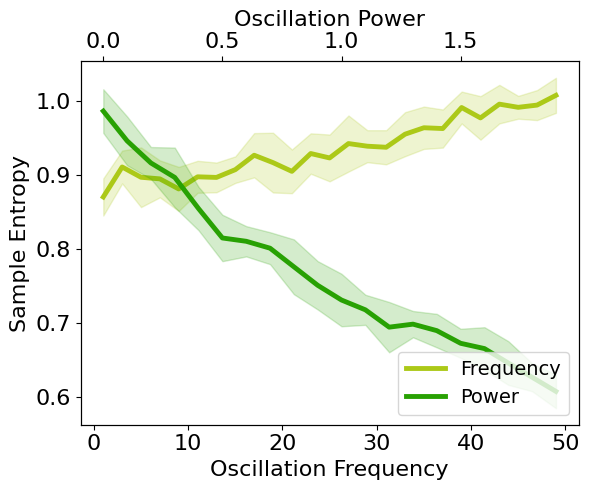

In [22]:
# Plot sample entropy measures across periodic variations
plot_pe_sims(sa_sims_freq, sa_sims_freq_var, sa_sims_pow, sa_sims_pow_var,
             'Sample Entropy', save_fig=SAVE_FIG, file_name='sa_pe' + EXT, file_path=FIGPATH)

## Permutation Entropy

Permutation entropy is a measure of entropy based on the probabilities of sequences within the time series.

Permutation entropy was introduced in 2002 by Bandt & Pompe.

#### Aperiodic Variations

In [23]:
# Run simulations calculating permutation entropy across exponents
pe_sims_exp, pe_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, perm_entropy, PE_ENT_PARAMS,
    'update_exp', EXPS, N_SIMS, var_func=np.std)

In [24]:
# Run simulations calculating permutation entropy across exponents, with an oscillation
pe_sims_comb, pe_sims_exp_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, perm_entropy, PE_ENT_PARAMS,
    'update_comb_exp', EXPS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


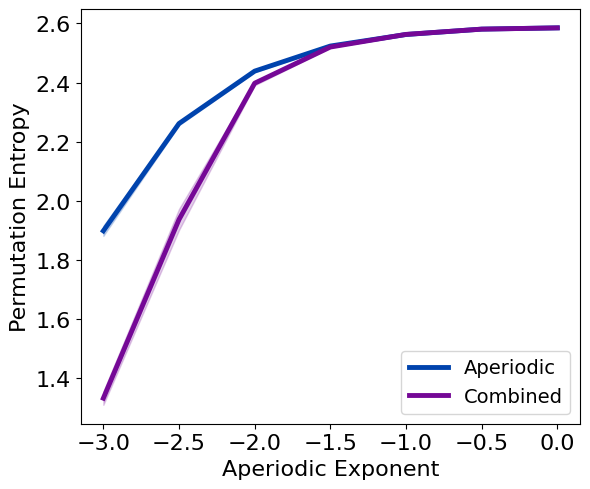

In [25]:
# Plot permutation entropy measures across periodic variations
plot_ap_sims(pe_sims_exp, pe_sims_exp_var, pe_sims_comb, pe_sims_exp_comb_var,
             'Permutation Entropy', save_fig=SAVE_FIG, file_name='pe_ap' + EXT, file_path=FIGPATH)

In [26]:
# Run a set of simulations, calculating permutation entropy across oscillation frequency
pe_sims_freq, pe_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, perm_entropy, PE_ENT_PARAMS,
    'update_freq', FREQS, N_SIMS, var_func=np.std)

In [27]:
# Run simulations calculating permutation entropy across oscillation power
pe_sims_pow, pe_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, perm_entropy, PE_ENT_PARAMS,
    'update_pow', POWERS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


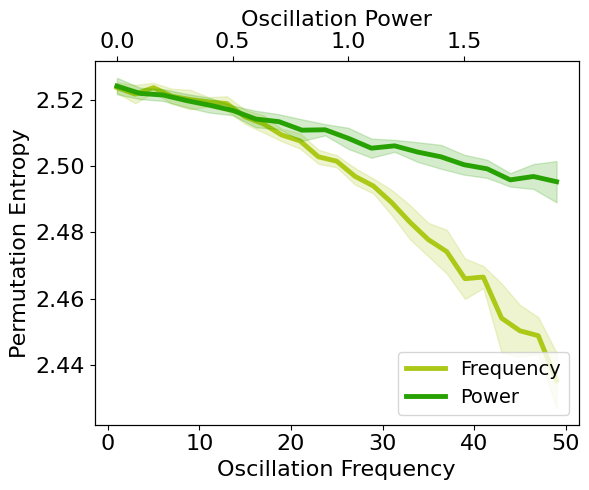

In [28]:
# Plot permutation entropy measures across periodic variations
plot_pe_sims(pe_sims_freq, pe_sims_freq_var, pe_sims_pow, pe_sims_pow_var,
             'Permutation Entropy', save_fig=SAVE_FIG, file_name='pe_pe' + EXT, file_path=FIGPATH)

## Weighted Permutation Entropy

#### Aperiodic Variations

In [29]:
# Run simulations calculating weighted permutation entropy across exponents
wpe_sims_exp, wpe_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, wperm_entropy, PE_ENT_PARAMS,
    'update_exp', EXPS, N_SIMS, var_func=np.std)

In [30]:
# Run simulations calculating weighted permutation entropy across exponents, with an oscillation
wpe_sims_comb, wpe_sims_exp_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, wperm_entropy, PE_ENT_PARAMS,
    'update_comb_exp', EXPS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


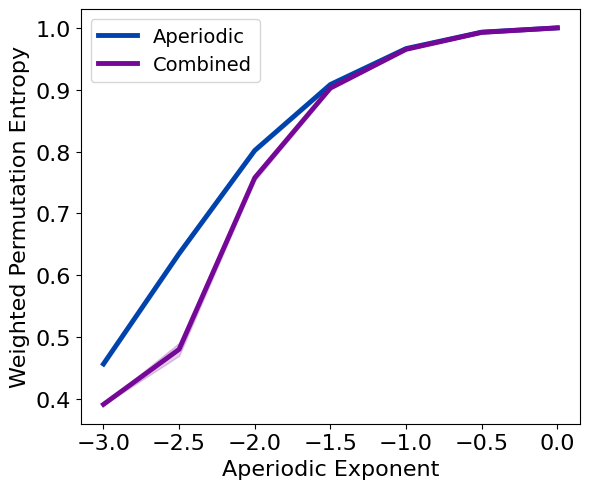

In [31]:
# Plot weighted permutation entropy measures across periodic variations
plot_ap_sims(wpe_sims_exp, wpe_sims_exp_var, wpe_sims_comb, wpe_sims_exp_comb_var,
             'Weighted Permutation Entropy', save_fig=SAVE_FIG, file_name='pe_ap' + EXT, file_path=FIGPATH)

#### Periodic Variations

In [32]:
# Run a set of simulations, calculating weighted permutation entropy across oscillation frequency
wpe_sims_freq, wpe_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, wperm_entropy, PE_ENT_PARAMS,
    'update_freq', FREQS, N_SIMS, var_func=np.std)

In [33]:
# Run simulations calculating weighted permutation entropy across oscillation power
wpe_sims_pow, wpe_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, wperm_entropy, PE_ENT_PARAMS,
    'update_pow', POWERS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


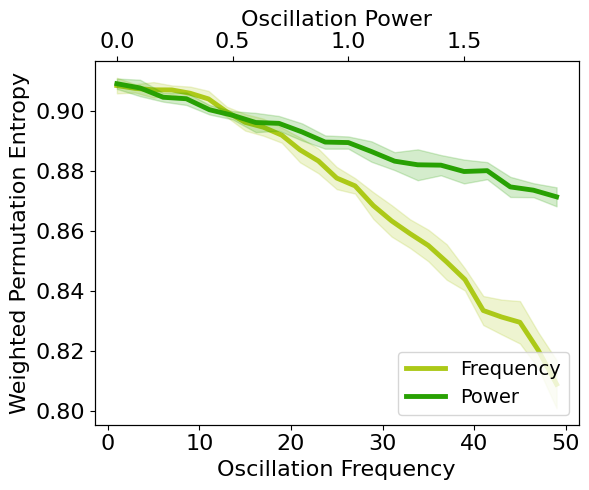

In [34]:
# Plot weighted permutation entropy measures across periodic variations
plot_pe_sims(wpe_sims_freq, wpe_sims_freq_var, wpe_sims_pow, wpe_sims_pow_var,
             'Weighted Permutation Entropy', save_fig=SAVE_FIG, file_name='pe_pe' + EXT, file_path=FIGPATH)

## Conclusions

Overall, we can see the following patterns in these simulations:

Entropy (general patterns across all):
- Entropy increases for decreasing aperiodic exponents, non-linearly
- Entropy decreases for increasing oscillatory power, approximately linearly